In [1]:
# 导入包
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sklearn
import pandas as pd
import os
import sys
import time
import gzip
import tensorflow as tf

from tensorflow import keras

print(tf.__version__)
print(sys.version_info)
for module in mpl, np, pd, sklearn, tf, keras:
    print(module.__name__, module.__version__)

2.2.0
sys.version_info(major=3, minor=6, micro=4, releaselevel='final', serial=0)
matplotlib 2.1.2
numpy 1.19.1
pandas 0.22.0
sklearn 0.19.1
tensorflow 2.2.0
tensorflow.keras 2.3.0-tf


In [6]:
def load_data():
  """Loads the Fashion-MNIST dataset.

  This is a dataset of 60,000 28x28 grayscale images of 10 fashion categories,
  along with a test set of 10,000 images. This dataset can be used as
  a drop-in replacement for MNIST. The class labels are:

  | Label | Description |
  |:-----:|-------------|
  |   0   | T-shirt/top |
  |   1   | Trouser     |
  |   2   | Pullover    |
  |   3   | Dress       |
  |   4   | Coat        |
  |   5   | Sandal      |
  |   6   | Shirt       |
  |   7   | Sneaker     |
  |   8   | Bag         |
  |   9   | Ankle boot  |

  Returns:
      Tuple of Numpy arrays: `(x_train, y_train), (x_test, y_test)`.

      **x_train, x_test**: uint8 arrays of grayscale image data with shape
        (num_samples, 28, 28).

      **y_train, y_test**: uint8 arrays of labels (integers in range 0-9)
        with shape (num_samples,).

  License:
      The copyright for Fashion-MNIST is held by Zalando SE.
      Fashion-MNIST is licensed under the [MIT license](
      https://github.com/zalandoresearch/fashion-mnist/blob/master/LICENSE).

  """
  dirname = os.path.join('datasets', 'fashion-mnist')
  # 数据下载到本地，提供一个本地的文件夹地址
  base = 'data/'
  # base = 'https://storage.googleapis.com/tensorflow/tf-keras-datasets/'
  files = [
      'train-labels-idx1-ubyte.gz', 'train-images-idx3-ubyte.gz',
      't10k-labels-idx1-ubyte.gz', 't10k-images-idx3-ubyte.gz'
  ]

  paths = [base + f_name for f_name in files]
  # for fname in files:
  #   paths.append(get_file(fname, origin=base + fname, cache_subdir=dirname))

  with gzip.open(paths[0], 'rb') as lbpath:
    y_train = np.frombuffer(lbpath.read(), np.uint8, offset=8)

  with gzip.open(paths[1], 'rb') as imgpath:
    x_train = np.frombuffer(
        imgpath.read(), np.uint8, offset=16).reshape(len(y_train), 28, 28)

  with gzip.open(paths[2], 'rb') as lbpath:
    y_test = np.frombuffer(lbpath.read(), np.uint8, offset=8)

  with gzip.open(paths[3], 'rb') as imgpath:
    x_test = np.frombuffer(
        imgpath.read(), np.uint8, offset=16).reshape(len(y_test), 28, 28)

  return (x_train, y_train), (x_test, y_test)

In [14]:
# fashion_mnist = keras.datasets.fashion_mnist
(x_train_all, y_train_all), (x_test, y_test) = load_data()
x_valid, x_train = x_train_all[:5000], x_train_all[5000:]
y_valid, y_train = y_train_all[:5000], y_train_all[5000:]

print(x_valid.shape, y_valid.shape)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(5000, 28, 28) (5000,)
(55000, 28, 28) (55000,)
(10000, 28, 28) (10000,)


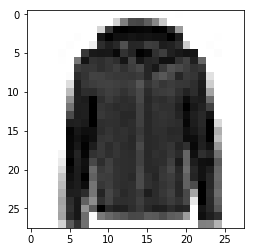

In [15]:
def show_single_image(img_dir):
    plt.imshow(img_dir, cmap="binary")
    plt.show()

show_single_image(x_train[0])


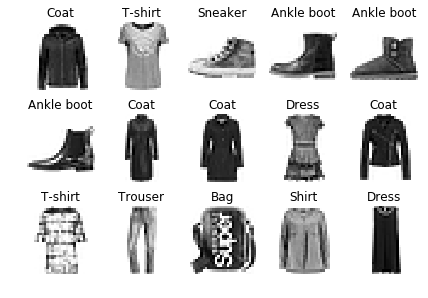

In [16]:
def show_imgs(n_rows, n_cols, x_data, y_data, class_names):
    """
    指定行列个数，显示数据集中的n_rows*n_cols个样本图像
    """
    assert len(x_data) == len(y_data)
    assert n_rows * n_cols < len(x_data)
    plt.figure(figsize = (n_cols * 1.4, n_rows * 1.6))
    for row in range(n_rows):
        for col in range(n_cols):
            index = n_cols * row + col
            plt.subplot(n_rows, n_cols, index + 1)
            plt.imshow(x_data[index], cmap="binary", interpolation = "nearest")
            plt.axis('off')
            plt.title(class_names[y_data[index]])
    plt.show()

# 指定类别
class_names = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
# 查看15个样本图片
show_imgs(3, 5, x_train, y_train, class_names)

In [26]:
# tf.keras.models.Sequential()


model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

"""
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])
"""
# relu: y = max(0, x)
# softmax: 将向量变成概率分布. x = [x1, x2, x3], 
#          y = [e^x1/sum, e^x2/sum, e^x3/sum], sum = e^x1 + e^x2 + e^x3

# reason for sparse: y->index. y->one_hot->[] 
# 由于此处的数据类型y是一个数，所以此处使用sparse_categorical_crossentropy，如果y是one_hot向量，那么此处使用categorical_crossentropy
model.compile(loss="sparse_categorical_crossentropy",
              optimizer = "sgd",
              metrics = ["accuracy"])

In [27]:
model.layers

In [28]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_7 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [29]:
# [None, 784] * W + b -> [None, 300] W.shape [784, 300], b = [300]

In [30]:
x_train.shape,y_train.shape

((55000, 28, 28), (55000,))

In [47]:
history = model.fit(x_train, y_train, epochs=10,validation_split=False,batch_size=64,validation_data=(x_valid, y_valid))

Epoch 1/10
860/860 [==============================] - 3s 3ms/step - loss: 2.3026 - accuracy: 0.0986 - val_loss: 2.3028 - val_accuracy: 0.0914
Epoch 2/10
860/860 [==============================] - 3s 3ms/step - loss: 2.3026 - accuracy: 0.0991 - val_loss: 2.3029 - val_accuracy: 0.0914
Epoch 3/10
860/860 [==============================] - 3s 3ms/step - loss: 2.3026 - accuracy: 0.0985 - val_loss: 2.3028 - val_accuracy: 0.0914
Epoch 4/10
860/860 [==============================] - 3s 3ms/step - loss: 2.3026 - accuracy: 0.0988 - val_loss: 2.3029 - val_accuracy: 0.0914
Epoch 5/10
860/860 [==============================] - 3s 3ms/step - loss: 2.3026 - accuracy: 0.1001 - val_loss: 2.3028 - val_accuracy: 0.0914
Epoch 6/10
860/860 [==============================] - 3s 3ms/step - loss: 2.3026 - accuracy: 0.0986 - val_loss: 2.3028 - val_accuracy: 0.0914
Epoch 7/10
860/860 [==============================] - 3s 3ms/step - loss: 2.3026 - accuracy: 0.1008 - val_loss: 2.3028 - val_accuracy: 0.0914
Epoch 

看到这样的准确率，内心绝对

In [38]:
type(history)

tensorflow.python.keras.callbacks.History

In [39]:
history.history

{'accuracy': [0.09905454516410828,
  0.10116363316774368,
  0.09749090671539307,
  0.09958181530237198,
  0.09843636304140091,
  0.09821818023920059,
  0.09734545648097992,
  0.1000545471906662,
  0.09998181462287903,
  0.0989818200469017],
 'loss': [2.302921772003174,
  2.302874803543091,
  2.302971839904785,
  2.3028604984283447,
  2.3029799461364746,
  2.3029377460479736,
  2.3030099868774414,
  2.302891731262207,
  2.3029096126556396,
  2.3028926849365234],
 'val_accuracy': [0.09860000014305115,
  0.09759999811649323,
  0.10019999742507935,
  0.09139999747276306,
  0.09799999743700027,
  0.1111999973654747,
  0.09799999743700027,
  0.10019999742507935,
  0.10019999742507935,
  0.10080000013113022],
 'val_loss': [2.302537679672241,
  2.3035120964050293,
  2.303284168243408,
  2.303611993789673,
  2.3037195205688477,
  2.30253267288208,
  2.3035061359405518,
  2.30228328704834,
  2.302734851837158,
  2.3030896186828613]}

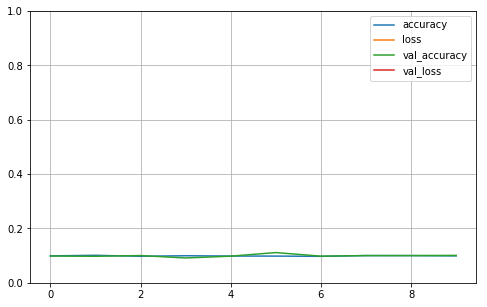

In [40]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.show()

plot_learning_curves(history)

In [42]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 2.3030 - accuracy: 0.1000


[2.3030314445495605, 0.10000000149011612]

In [49]:
print(np.max(x_train), np.min(x_train))

255 0
